In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Colab Notebooks/Kaggle"

# Importing the Dataset from Kaggle

[DataSource](https://www.kaggle.com/c/nlp-getting-started/data)

 [How to import Dataset from Kaggle](https://www.kaggle.com/general/74235)

In [ ]:
%cd /content/gdrive/My Drive/Colab Notebooks/Kaggle

/content/gdrive/My Drive/Colab Notebooks/Kaggle


In [ ]:
#Importing Libraries Used 
import numpy as np #
import pandas as pd # 
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import tensorflow as tf
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.callbacks import EarlyStopping
from tqdm import tqdm
from keras.models import Sequential
from keras.layers import Embedding,LSTM,Dense,SpatialDropout1D
from keras.initializers import Constant
from sklearn.model_selection import train_test_split
from keras.optimizers import Adam
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import ModelCheckpoint
import tensorflow_hub as hub
from nltk import PorterStemmer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_recall_fscore_support 
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.callbacks import EarlyStopping
from tqdm import tqdm
from keras.models import Sequential
from keras.layers import Embedding,LSTM,Dense,SpatialDropout1D
from keras.initializers import Constant
from sklearn.model_selection import train_test_split
from keras.optimizers import Adam


In [ ]:
train_df_master = pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/Kaggle/train.csv")
test_df_master = pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/Kaggle/test.csv")

In [ ]:
train_df = pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/Kaggle/train.csv")
test_df = pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/Kaggle/test.csv")

In [ ]:
len(train_df)

7613

In [ ]:
len(test_df)

3263

# Exploratory Data analysis and Cleaning

##EDA

**Visualizing Counts for each categories of tweet**

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


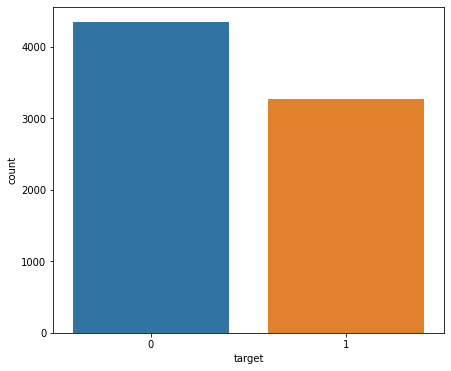

In [ ]:
fig = plt.figure(figsize=(7,6))
sns.countplot(train_df['target'])

There are only two classes 0 and 1.The class distribution above shows that their are more tweets with class 0 ( No disaster) than class 1 ( disaster tweets)

**Number of words in a tweet**

Text(0.5, 1.0, 'disaster tweets')

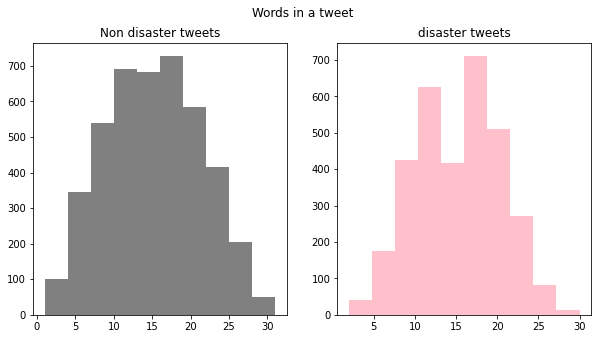

In [ ]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
tweets = train_df[train_df['target']==0]['text'].str.split().map(lambda x: len(x))
ax1.hist(tweets, color='grey')
ax1.set_title('Non disaster tweets')
fig.suptitle('Words in a tweet')
tweets = train_df[train_df['target']==1]['text'].str.split().map(lambda x: len(x))
ax2.hist(tweets, color='pink')
ax2.set_title('disaster tweets')


We have Almost similar number of words in a Tweet.

In [ ]:
df_box = train_df[['text', 'target']]
df_box['length'] = train_df['text'].str.split().map(lambda x: len(x))
df_box.head()

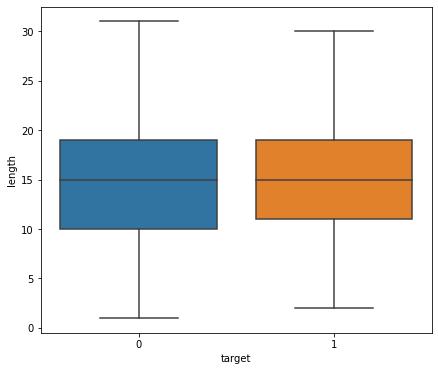

In [ ]:
fig = plt.figure(figsize=(7,6))
sns.boxplot(x='target', y='length', data=df_box)
plt.show()

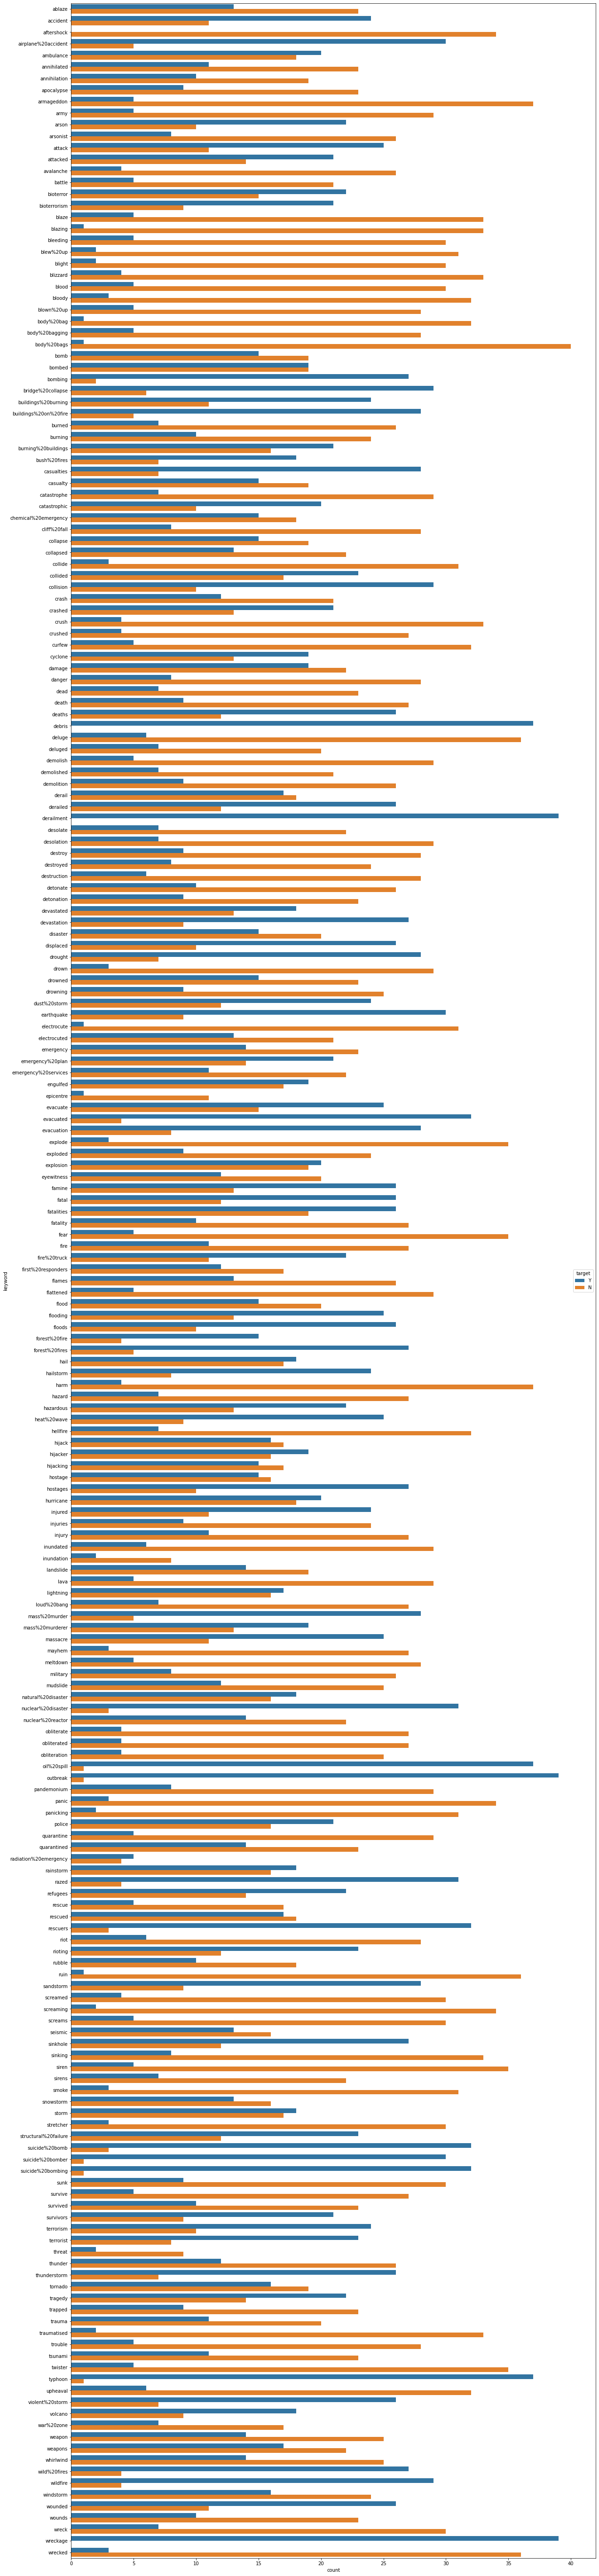

In [ ]:
#Distinct keywords in train dataset
cnt_plot =train_df[['keyword', 'target']]
cnt_plot = cnt_plot.dropna(axis=0)

cnt_plot['target'] = cnt_plot['target'].apply(lambda x: 'Y' if x ==1 else 'N')
plt.figure(figsize=(20, 100))
sns.countplot(y='keyword', hue='target', data=cnt_plot)
plt.show()

##Data Cleaning

Some basic cleaning such as removing punctuations,removing html tags ,urls ,digits and emojis

**Helper functions for Data Cleaning**

### Removing Emojis from Tweets

In [ ]:
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

### Remove URLs from Tweets

In [ ]:
def remove_URL(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'',text)

### Removing HTML

In [ ]:
def remove_html(text):
    html=re.compile(r'<.*?>')
    return html.sub(r'',text)

### Removing Punctuations

In [ ]:
def remove_punct(text):
    table=str.maketrans('','',string.punctuation)
    return text.translate(table)

### Removing Digits

In [ ]:
def remove_digits(text):
    text = re.sub(r"\d", "", text) # to remove digits
    return text

### Applying helper functions on dataset

In [ ]:
# Removing Emojis from Dataset
train_df['text'] = train_df['text'].apply(lambda x: remove_emoji(x))
test_df['text'] = test_df['text'].apply(lambda x: remove_emoji(x))

In [ ]:
# Removing URLs from Dataset
train_df['text']=train_df['text'].apply(lambda x : remove_URL(x))
test_df['text']=test_df['text'].apply(lambda x : remove_URL(x))

In [ ]:
# Removing HTML from Dataset
train_df['text']=train_df['text'].apply(lambda x : remove_html(x))
test_df['text'] = test_df['text'].apply(lambda x: remove_html(x))

In [ ]:
# Removing Punctuations from DataSet
train_df['text']=train_df['text'].apply(lambda x : remove_punct(x))
test_df['text'] = test_df['text'].apply(lambda x: remove_punct(x))

In [ ]:
# Removing Digits
train_df['text']=train_df['text'].apply(lambda x : remove_digits(x))
test_df['text'] = test_df['text'].apply(lambda x: remove_digits(x))

In [ ]:
train_df.head(10)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this earthquake Ma...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask Canada,1
2,5,NaN,NaN,All residents asked to shelter in place are be...,1
3,6,NaN,NaN,people receive wildfires evacuation orders in...,1
4,7,NaN,NaN,Just got sent this photo from Ruby Alaska as s...,1
5,8,NaN,NaN,RockyFire Update California Hwy closed in bo...,1
6,10,NaN,NaN,flood disaster Heavy rain causes flash floodin...,1
7,13,NaN,NaN,Im on top of the hill and I can see a fire in ...,1
8,14,NaN,NaN,Theres an emergency evacuation happening now i...,1
9,15,NaN,NaN,Im afraid that the tornado is coming to our area,1


Converting to lower case

In [ ]:
# Convert to Lower Case
train_df['text'] = train_df['text'].apply(lambda x: x.lower())

**Checking Missing Values**

In [ ]:
#Checking how many values are null in the dataset
train_df.isnull().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [ ]:
test_df.isnull().sum()

id             0
keyword       26
location    1105
text           0
dtype: int64

Dropping Location column prior to model creation for Classifiers 

In [ ]:
# Dropping Location column
train_df = train_df.drop('location', axis=1)

In [ ]:
# Dropping all rows with null values for Keyword
train_df = train_df.dropna(axis=0)
print(len(train_df))

7552


In [ ]:
train_df.head()['text'].values

array(['bbcmtd wholesale markets ablaze ',
       'we always try to bring the heavy metal rt ',
       'africanbaze breaking newsnigeria flag set ablaze in aba ',
       'crying out for more set me ablaze',
       'on plus side look at the sky last night it was ablaze '],
      dtype=object)

## Using NTLK 
*Natural Language Toolkit *

In [ ]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk
import nltk
nltk.download("popular") #Install Multiple nltk packages

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_reviews.zip.
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/names.zip.
[nltk_data]    | Downloading package shakespeare to /root/nltk_data...
[nlt

True

In [ ]:
stop = stopwords.words('english')
print(stop) #Printing Stop Words

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

###Removing Stop Words,Stemming and Creating Corpus

Ref : https://towardsdatascience.com/stemming-vs-lemmatization-2daddabcb221

**Stop words** are usually the most common words in a language and they will be irrelevant in determining the nature so we remove them.

**Stemming** is the process of reducing words to their word stem, base or root form. 

After this we **create a corpus** which is a simplified version of our clean text data.

In [ ]:
train_df.head()

,id,keyword,text,target
31,48,ablaze,bbcmtd wholesale markets ablaze,1
32,49,ablaze,we always try to bring the heavy metal rt,0
33,50,ablaze,africanbaze breaking newsnigeria flag set abla...,1
34,52,ablaze,crying out for more set me ablaze,0
35,53,ablaze,on plus side look at the sky last night it was...,0


In [ ]:
corpus  = []
pstem = PorterStemmer()
for i in range(train_df['text'].shape[0]):
    text =  train_df['text'].values[i]
    text = text.split()
    #Remove stopwords then Stemming it
    text = [pstem.stem(word) for word in text if not word in set(stopwords.words('english'))]
    text = ' '.join(text)
    #Append cleaned tweet to corpus
    corpus.append(text)
    
print("Corpus created successfully")  
print(corpus)

Corpus created successfully
['bbcmtd wholesal market ablaz', 'alway tri bring heavi metal rt', 'africanbaz break newsnigeria flag set ablaz aba', 'cri set ablaz', 'plu side look sky last night ablaz', 'phdsquar mufc theyv built much hype around new acquisit doubt set epl ablaz season', 'inec offic abia set ablaz', 'barbado bridgetown jamaica \x89ûò two car set ablaz santa cruz \x89ûó head st elizabeth polic superintend', 'ablaz lord', 'check nsfw', 'outsid your ablaz aliv your dead insid', 'awesom time visit cfc head offic ancop site ablaz thank tita vida take care us', 'soooo pump ablaz southridgelif', 'want set chicago ablaz preach hotel', 'gain follow last week know stat grow', 'west burn thousand wildfir ablaz california alon', 'build perfect tracklist life leav street ablaz', 'check nsfw', 'first night retain quit weird better get use wear everi singl night next year least', 'deputi man shot brighton home set ablaz', 'man wife get six year jail set ablaz niec', 'santa cruz \x89ûó 

#Beginner's Approach

### Creating a Bag of Word Model

Ref : https://machinelearningmastery.com/gentle-introduction-bag-words-model/

Ref : https://towardsdatascience.com/a-simple-explanation-of-the-bag-of-words-model-b88fc4f4971

Ref : https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

In [ ]:
cv = CountVectorizer(max_features = len(corpus))
#Create Bag of Words Model , here X represent bag of words, Y represents the label /target 
X = cv.fit_transform(corpus).todense()
y = train_df['target'].values   

In [ ]:
print(X)  #Text Data converted into Numeric structure

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
print(X.shape)
print(y.shape)

(7552, 7552)
(7552,)


### Split the training data in Train and Validation set

In [ ]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.3, random_state=2020)

**Importing all Classifiers**

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from xgboost import XGBClassifier

In [ ]:
df_AUC = pd.DataFrame( columns = ['Model Name', 'ROC AUC Score']) 

In [ ]:
df_AUC["Model Name"]

0             Gaussian Naive Bayes
1             K- Nearest neighbour
2                    Decision Tree
3              Logistic Regression
4                          XGBoost
5    Multinomial Naive bayes Model
6           RandomForestClassifier
Name: Model Name, dtype: object

### Gaussian Naive Bayes Model

In [ ]:
# Fitting Gaussian Naive Bayes to the Training set
classifier_gnb = GaussianNB()
classifier_gnb.fit(X_train, y_train)
# Predicting the Train data set results
y_pred_gnb = classifier_gnb.predict(X_test)

# Classification Reports
report_gnb = classification_report(y_test, y_pred_gnb)
print(report_gnb)
y_auc = roc_auc_score(y_test, y_pred_gnb)
print('Gaussian Naive Bayes Model: ROC AUC=%.3f' % (y_auc))
new_row = {'Model Name':'Gaussian Naive Bayes', 'ROC AUC Score':y_auc }
df_AUC = df_AUC.append(new_row, ignore_index=True)

              precision    recall  f1-score   support

           0       0.74      0.48      0.58      1275
           1       0.54      0.79      0.64       991

    accuracy                           0.61      2266
   macro avg       0.64      0.63      0.61      2266
weighted avg       0.65      0.61      0.61      2266

Gaussian Naive Bayes Model: ROC AUC=0.633


### K-Nearest Neighbour

In [ ]:
# Fitting K- Nearest neighbour to the Training set
classifier_knn = KNeighborsClassifier(n_neighbors = 7, weights = 'distance',algorithm = 'brute')
classifier_knn.fit(X_train, y_train)
# Predicting the Train data set results
y_pred_knn = classifier_knn.predict(X_test)
# Classification Reports
report_knn = classification_report(y_test, y_pred_knn)
print(report_knn)
y_auc = roc_auc_score(y_test, y_pred_knn)
print('K- Nearest neighbour: ROC AUC=%.3f' % (y_auc))
new_row = {'Model Name':' K- Nearest neighbour', 'ROC AUC Score':y_auc }
df_AUC = df_AUC.append(new_row, ignore_index=True)

              precision    recall  f1-score   support

           0       0.66      0.95      0.78      1275
           1       0.86      0.37      0.52       991

    accuracy                           0.70      2266
   macro avg       0.76      0.66      0.65      2266
weighted avg       0.75      0.70      0.67      2266

K- Nearest neighbour: ROC AUC=0.664


### Decision Tree Classifier

In [ ]:
# Fitting Decision Tree Models to the Training set
classifier_dt = DecisionTreeClassifier(criterion= 'gini',
                                           max_depth = 10, 
                                           splitter='best', 
                                           random_state=55)
classifier_dt.fit(X_train, y_train)
# Predicting the Train data set results
y_pred_dt = classifier_dt.predict(X_test)
# Classification Reports
report_dt = classification_report(y_test, y_pred_dt)
print(report_dt)
y_auc = roc_auc_score(y_test, y_pred_dt)
print('Decision Tree: ROC AUC=%.3f' % (y_auc))
new_row = {'Model Name':'Decision Tree', 'ROC AUC Score':y_auc }
df_AUC = df_AUC.append(new_row, ignore_index=True)

              precision    recall  f1-score   support

           0       0.63      0.96      0.76      1275
           1       0.84      0.27      0.41       991

    accuracy                           0.66      2266
   macro avg       0.73      0.62      0.59      2266
weighted avg       0.72      0.66      0.61      2266

Decision Tree: ROC AUC=0.616


### Logistic Regression Model

In [ ]:
# Fitting Logistic Regression Model to the Training set
classifier_lr = LogisticRegression()
classifier_lr.fit(X_train, y_train)
# Predicting the Train data set results
y_pred_lr = classifier_lr.predict(X_test)
# Classification Reports
report_lr = classification_report(y_test, y_pred_lr)
print(report_lr)
y_auc = roc_auc_score(y_test, y_pred_lr)
print('Logistic Regression Model: ROC AUC=%.3f' % (y_auc))
new_row = {'Model Name':'Logistic Regression', 'ROC AUC Score':y_auc }
df_AUC = df_AUC.append(new_row, ignore_index=True)


              precision    recall  f1-score   support

           0       0.78      0.86      0.82      1275
           1       0.80      0.69      0.74       991

    accuracy                           0.79      2266
   macro avg       0.79      0.78      0.78      2266
weighted avg       0.79      0.79      0.79      2266

Logistic Regression Model: ROC AUC=0.778


### XGBoost Classifier

In [ ]:
# Fitting XGBoost Model to the Training set
classifier_xgb = XGBClassifier(max_depth=6,learning_rate=0.3,random_state=123,n_jobs=4)
classifier_xgb.fit(X_train, y_train)
# Predicting the Train data set results
y_pred_xgb = classifier_xgb.predict(X_test)
# Classification Reports
report_xgb = classification_report(y_test, y_pred_xgb)
print(report_xgb)
y_auc = roc_auc_score(y_test, y_pred_xgb)
print('XGBoost Model: ROC AUC=%.3f' % (y_auc))
new_row = {'Model Name':'XGBoost', 'ROC AUC Score':y_auc }
df_AUC = df_AUC.append(new_row, ignore_index=True)

              precision    recall  f1-score   support

           0       0.77      0.90      0.83      1275
           1       0.83      0.65      0.73       991

    accuracy                           0.79      2266
   macro avg       0.80      0.77      0.78      2266
weighted avg       0.79      0.79      0.78      2266

XGBoost Model: ROC AUC=0.773


### Multinomial Naive Bayes

In [ ]:
# Fitting multinomial naive bayes Model to the Training set
classifier_mnb = MultinomialNB()
classifier_mnb.fit(X_train, y_train)
# Predicting the Train data set results
y_pred_mnb = classifier_mnb.predict(X_test)
# Classification Reports
report_mnb = classification_report(y_test, y_pred_mnb)
print(report_mnb)
y_auc = roc_auc_score(y_test, y_pred_mnb)
print('Multinomial naive bayes Model: ROC AUC=%.3f' % (y_auc))
new_row = {'Model Name':'Multinomial Naive bayes Model', 'ROC AUC Score':y_auc }
df_AUC = df_AUC.append(new_row, ignore_index=True)

              precision    recall  f1-score   support

           0       0.81      0.86      0.83      1275
           1       0.80      0.73      0.77       991

    accuracy                           0.80      2266
   macro avg       0.80      0.80      0.80      2266
weighted avg       0.80      0.80      0.80      2266

Multinomial naive bayes Model: ROC AUC=0.795


### Random Forest Classifier

In [ ]:
rfc = RandomForestClassifier(
                             max_depth=4,
                             random_state=100,
                             min_samples_leaf=100, 
                             min_samples_split=100,
                             n_estimators=50)
rfc.fit(X_train, y_train)
y_pred_rfc = rfc.predict(X_test)
# Classification Reports
report_rfc = classification_report(y_test, y_pred_rfc)
print(report_rfc)
y_auc = roc_auc_score(y_test, y_pred_rfc)
print('RandomForestClassifier: ROC AUC=%.3f' % (y_auc))
new_row = {'Model Name':'RandomForestClassifier', 'ROC AUC Score':y_auc }
df_AUC = df_AUC.append(new_row, ignore_index=True)

              precision    recall  f1-score   support

           0       0.56      1.00      0.72      1275
           1       0.00      0.00      0.00       991

    accuracy                           0.56      2266
   macro avg       0.28      0.50      0.36      2266
weighted avg       0.32      0.56      0.41      2266

RandomForestClassifier: ROC AUC=0.500


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
df_AUC

,Model Name,ROC AUC Score
0,Gaussian Naive Bayes,0.633262
1,K- Nearest neighbour,0.664440
2,Decision Tree,0.615834
3,Logistic Regression,0.777880
4,XGBoost,0.772543
5,Multinomial Naive bayes Model,0.795316
6,RandomForestClassifier,0.500000


##ROC Score Comparison of Various Classifiers

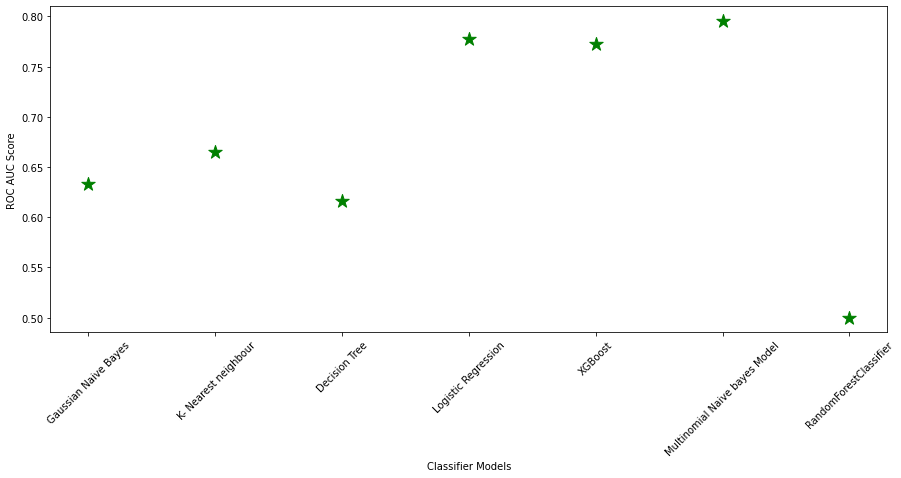

In [ ]:
fig = plt.figure(figsize=(15,6))
plt.scatter(df_AUC["Model Name"], df_AUC["ROC AUC Score"],color='Green',s=200, marker='*')
plt.xticks(rotation=45)

fig.savefig("ClassifiersComparison.pdf")

# Plot axes labels and show the plot
plt.ylabel('ROC AUC Score')
plt.xlabel('Classifier Models')
plt.show()

##**Conclusion**


The performance of these models can be further improved , by making the vector representation of the text data more meaningful.

Some Examples could be
Keeping the dimension of Bag of world model reasonable by using words which have a higher frequency and are unique.

Using other word embeddings like Word2vec where Semantic and syntactic relationships of words are maintained  as opposed to a simple Bag Of Word approach


#Neural Network Approach

##**TPU**

In [ ]:
import tensorflow as tf
print("GPU Available: ", tf.test.is_gpu_available())
print("Tensorflow version: ", tf.__version__)
print("Keras Version: ", tf.keras.__version__)

try:
  tpu = tf.distribute.cluster_resolver.TPUClusterResolver()
  tf.config.experimental_connect_to_cluster(tpu)
  tf.tpu.experimental.initialize_tpu_system(tpu)
  strategy = tf.distribute.experimental.TPUStrategy(tpu)
except ValueError:
  strategy = tf.distribute.get_strategy()

print("Number of accelerators: ", strategy.num_replicas_in_sync)
num_replicas = strategy.num_replicas_in_sync

GPU Available:  False
Tensorflow version:  2.3.0
Keras Version:  2.4.0


INFO:tensorflow:Initializing the TPU system: grpc://10.99.242.18:8470


INFO:tensorflow:Initializing the TPU system: grpc://10.99.242.18:8470


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


Number of accelerators:  8


In [ ]:
if tpu:
  BATCH_SIZE = 64 * num_replicas
  print("Batch Size TPU: ",BATCH_SIZE)
else:
  BATCH_SIZE = 512

EPOCHS = 1000

Batch Size TPU:  512


##**GloVe for Vectorization**


Ref : https://nlp.stanford.edu/projects/glove/

Ref: https://medium.com/analytics-vidhyaword-vectorization-using-glove-76919685ee0b

Ref : https://www.kaggle.com/shahules/basic-eda-cleaning-and-glove

Creating Corpus for Glove.

In [ ]:
train_df_new_format= train_df

In [ ]:
train_df

,id,keyword,text,target
31,48,ablaze,bbcmtd wholesale markets ablaze,1
32,49,ablaze,we always try to bring the heavy metal rt,0
33,50,ablaze,africanbaze breaking newsnigeria flag set abla...,1
34,52,ablaze,crying out for more set me ablaze,0
35,53,ablaze,on plus side look at the sky last night it was...,0
...,...,...,...,...
7578,10830,wrecked,jtruff cameronhacker and i wrecked you both,0
7579,10831,wrecked,three days off from work and theyve pretty muc...,0
7580,10832,wrecked,fx forex trading cramer igers words that wrec...,0
7581,10833,wrecked,engineshed great atmosphere at the british lio...,0


In [ ]:
def create_corpus(df):
    corpus=[]
    for tweet in tqdm(df['text']):
        words=[word.lower() for word in word_tokenize(tweet) if((word.isalpha()==1) & (word.lower()  not in stop))]
        corpus.append(words)
    return corpus


In [ ]:
from nltk.tokenize import word_tokenize
def remove_stopwords(text):
    text_tokens = word_tokenize(text)
    tokens_without_sw = [word for word in text_tokens if not word in stop]
    return tokens_without_sw

In [ ]:
train_df_new_format['text']= train_df_new_format['text'].apply(lambda x: remove_stopwords(x))

In [ ]:
 corpus_for_glove = create_corpus(train_df)

100%|██████████| 7552/7552 [00:01<00:00, 6234.33it/s]


In [ ]:
print(corpus_for_glove)

[['bbcmtd', 'wholesale', 'markets', 'ablaze'], ['always', 'try', 'bring', 'heavy', 'metal', 'rt'], ['africanbaze', 'breaking', 'newsnigeria', 'flag', 'set', 'ablaze', 'aba'], ['crying', 'set', 'ablaze'], ['plus', 'side', 'look', 'sky', 'last', 'night', 'ablaze'], ['phdsquares', 'mufc', 'theyve', 'built', 'much', 'hype', 'around', 'new', 'acquisitions', 'doubt', 'set', 'epl', 'ablaze', 'season'], ['inec', 'office', 'abia', 'set', 'ablaze'], ['barbados', 'bridgetown', 'jamaica', 'two', 'cars', 'set', 'ablaze', 'santa', 'cruz', 'head', 'st', 'elizabeth', 'police', 'superintende'], ['ablaze', 'lord'], ['check', 'nsfw'], ['outside', 'youre', 'ablaze', 'alive', 'youre', 'dead', 'inside'], ['awesome', 'time', 'visiting', 'cfc', 'head', 'office', 'ancop', 'site', 'ablaze', 'thanks', 'tita', 'vida', 'taking', 'care', 'us'], ['soooo', 'pumped', 'ablaze', 'southridgelife'], ['wanted', 'set', 'chicago', 'ablaze', 'preaching', 'hotel'], ['gained', 'followers', 'last', 'week', 'know', 'stats', 'grow

In [ ]:
print(corpus)

[['deeds', 'reason', 'earthquake', 'may', 'allah', 'forgive', 'us'], ['forest', 'fire', 'near', 'la', 'ronge', 'sask', 'canada'], ['residents', 'asked', 'shelter', 'place', 'notified', 'officers', 'evacuation', 'shelter', 'place', 'orders', 'expected'], ['people', 'receive', 'wildfires', 'evacuation', 'orders', 'california'], ['got', 'sent', 'photo', 'ruby', 'alaska', 'smoke', 'wildfires', 'pours', 'school'], ['rockyfire', 'update', 'california', 'hwy', 'closed', 'directions', 'due', 'lake', 'county', 'fire', 'cafire', 'wildfires'], ['flood', 'disaster', 'heavy', 'rain', 'causes', 'flash', 'flooding', 'streets', 'manitou', 'colorado', 'springs', 'areas'], ['im', 'top', 'hill', 'see', 'fire', 'woods'], ['theres', 'emergency', 'evacuation', 'happening', 'building', 'across', 'street'], ['im', 'afraid', 'tornado', 'coming', 'area'], ['three', 'people', 'died', 'heat', 'wave', 'far'], ['haha', 'south', 'tampa', 'getting', 'flooded', 'hah', 'wait', 'second', 'live', 'south', 'tampa', 'gon',

In [ ]:
# Ref : https://stackoverflow.com/questions/50060241/how-to-use-glove-word-embeddings-file-on-google-colaboratory
!wget http://nlp.stanford.edu/data/glove.6B.zip

--2020-10-22 02:53:00--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2020-10-22 02:53:00--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2020-10-22 02:53:00--  http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip.3’

glove

In [ ]:
!unzip glove*.zip

In [ ]:
# Ref : https://www.kaggle.com/shahules/basic-eda-cleaning-and-glove#Data-Cleaning 
#Glove embedding is basically a file. So in first part, it just loads a file & separate word :
# vector value ( which is 100 D here)
embedding_dict={}
with open('/content/gdrive/My Drive/Colab Notebooks/Kaggle/glove.6B.100d.txt','r') as f:
    for line in f:
        values=line.split()
        word=values[0]
        vectors=np.asarray(values[1:],'float32')
        embedding_dict[word]=vectors 
f.close()

In [ ]:
#Ref : https://stackoverflow.com/questions/51956000/what-does-keras-tokenizer-method-exactly-do
MAX_LEN=50
tokenizer_obj=Tokenizer()
tokenizer_obj.fit_on_texts(corpus_for_glove)
sequences=tokenizer_obj.texts_to_sequences(corpus_for_glove)

tweet_pad=pad_sequences(sequences,maxlen=MAX_LEN,truncating='post',padding='post')

In [ ]:
word_index=tokenizer_obj.word_index
print('Number of unique words:',len(word_index))

Number of unique words: 16632


In [ ]:
print(word_index)

{'like': 1, 'amp': 2, 'im': 3, 'fire': 4, 'get': 5, 'new': 6, 'via': 7, 'news': 8, 'people': 9, 'one': 10, 'dont': 11, 'us': 12, 'video': 13, 'emergency': 14, 'disaster': 15, 'police': 16, 'would': 17, 'still': 18, 'time': 19, 'body': 20, 'got': 21, 'burning': 22, 'back': 23, 'crash': 24, 'storm': 25, 'day': 26, 'suicide': 27, 'know': 28, 'california': 29, 'buildings': 30, 'man': 31, 'first': 32, 'rt': 33, 'see': 34, 'pm': 35, 'going': 36, 'world': 37, 'cant': 38, 'nuclear': 39, 'bomb': 40, 'fires': 41, 'youtube': 42, 'attack': 43, 'love': 44, 'two': 45, 'dead': 46, 'go': 47, 'killed': 48, 'train': 49, 'full': 50, 'war': 51, 'hiroshima': 52, 'families': 53, 'life': 54, 'accident': 55, 'car': 56, 'today': 57, 'good': 58, 'may': 59, 'think': 60, 'watch': 61, 'many': 62, 'say': 63, 'u': 64, 'last': 65, 'could': 66, 'years': 67, 'want': 68, 'way': 69, 'na': 70, 'home': 71, 'make': 72, 'work': 73, 'collapse': 74, 'look': 75, 'best': 76, 'need': 77, 'mh': 78, 'help': 79, 'even': 80, 'death':

In [ ]:
#We are trying to build embedding matrix ( as LSTM(Neural Network) models consume matrix in embedding layer )
#. Size of that matrix will be (number of unique words in corpus * 100 )
# We are just going over  each word and filling up our own embbeding matrix from the Glove embeddings. 
#If a word in given corpus is part of embedding dict of glove we got a hit & we can get corresponding vector from Glove.
# If there is no matching word in embedding dict
#then it's an embedding miss & that word will have default vector ( which is a vector of size 1 * 100 with all zeros)

num_words=len(word_index)+1
embedding_matrix=np.zeros((num_words,100))

for word,i in tqdm(word_index.items()):
    if i > num_words:
        continue
    
    emb_vec=embedding_dict.get(word)
    if emb_vec is not None:
        embedding_matrix[i]=emb_vec
            

100%|██████████| 16632/16632 [00:00<00:00, 197686.65it/s]


In [ ]:
embedding_matrix

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.2687    ,  0.81708002,  0.69896001, ..., -0.40110001,
         0.74656999,  0.31121999],
       [-0.44497001,  0.26159999, -0.17784999, ..., -0.33028001,
         0.58111   ,  0.38205001],
       ...,
       [ 0.71877998, -0.079608  , -0.21757001, ...,  0.39598   ,
        -0.59564   , -0.29644999],
       [-0.15741999, -0.10167   ,  0.27871999, ..., -0.097166  ,
         0.062035  ,  0.16936   ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

##Split the available Data into Train and Test Set

In [ ]:
print(tweet_pad[1:])    # Padding of the train data is required to match with the embedding matrix

[[  167   732   823 ...     0     0     0]
 [ 6286   281  6287 ...     0     0     0]
 [ 1410   155   494 ...     0     0     0]
 ...
 [16631  6167  6166 ...     0     0     0]
 [16632   106  5085 ...     0     0     0]
 [ 1908  2177   509 ...     0     0     0]]


In [ ]:
train=tweet_pad
train.shape

(7552, 50)

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(train,train_df['target'].values,test_size=0.10)
print('Shape of train',X_train.shape)
print("Shape of Test ",X_test.shape)

Shape of train (6796, 50)
Shape of Test  (756, 50)


##Model 1 - LSTM 

In [ ]:
model=Sequential()

embedding=Embedding(num_words,100,embeddings_initializer=Constant(embedding_matrix),
                   input_length=MAX_LEN,trainable=False)

model.add(embedding)
model.add(SpatialDropout1D(0.2))
model.add(LSTM(64, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))


optimzer=Adam(learning_rate=1e-5)

model.compile(loss='binary_crossentropy',optimizer=optimzer,metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 50, 100)           1663300   
_________________________________________________________________
spatial_dropout1d (SpatialDr (None, 50, 100)           0         
_________________________________________________________________
lstm (LSTM)                  (None, 64)                42240     
_________________________________________________________________
dense (Dense)                (None, 1)                 65        
Total params: 1,705,605
Trainable params: 42,305
Non-trainable params: 1,663,300
_________________________________________________________________


In [ ]:
history=model.fit(X_train,y_train,batch_size=BATCH_SIZE,epochs=EPOCHS,validation_split=0.2,verbose=2)

Epoch 1/1000


11/11 - 2s - loss: 0.6931 - accuracy: 0.5835 - val_loss: 0.6930 - val_accuracy: 0.5706
Epoch 2/1000
11/11 - 1s - loss: 0.6930 - accuracy: 0.5745 - val_loss: 0.6929 - val_accuracy: 0.5706
Epoch 3/1000
11/11 - 1s - loss: 0.6929 - accuracy: 0.5745 - val_loss: 0.6928 - val_accuracy: 0.5706
Epoch 4/1000
11/11 - 1s - loss: 0.6928 - accuracy: 0.5745 - val_loss: 0.6927 - val_accuracy: 0.5706
Epoch 5/1000
11/11 - 1s - loss: 0.6926 - accuracy: 0.5745 - val_loss: 0.6926 - val_accuracy: 0.5706
Epoch 6/1000
11/11 - 1s - loss: 0.6925 - accuracy: 0.5745 - val_loss: 0.6925 - val_accuracy: 0.5706
Epoch 7/1000
11/11 - 1s - loss: 0.6924 - accuracy: 0.5745 - val_loss: 0.6924 - val_accuracy: 0.5706
Epoch 8/1000
11/11 - 1s - loss: 0.6923 - accuracy: 0.5745 - val_loss: 0.6923 - val_accuracy: 0.5706
Epoch 9/1000
11/11 - 1s - loss: 0.6922 - accuracy: 0.5745 - val_loss: 0.6921 - val_accuracy: 0.5706
Epoch 10/1000
11/11 - 1s - loss: 0.6921 - accuracy: 0.5745 - val_loss: 0.6920 - val_accuracy: 0.5706
Epoch 11/100

In [ ]:
#model.save('model1.h5')
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail(15)

,loss,accuracy,val_loss,val_accuracy,epoch
985,0.423513,0.815673,0.471050,0.786029,985
986,0.424071,0.818065,0.470556,0.785294,986
987,0.424041,0.816593,0.470201,0.785294,987
988,0.424664,0.817697,0.470287,0.785294,988
989,0.419646,0.821744,0.470584,0.787500,989
990,0.424436,0.817513,0.471089,0.788235,990
991,0.423491,0.814753,0.470679,0.786765,991
992,0.423292,0.817145,0.470378,0.788235,992
993,0.424079,0.815305,0.470071,0.786765,993
994,0.420737,0.817329,0.470229,0.786029,994


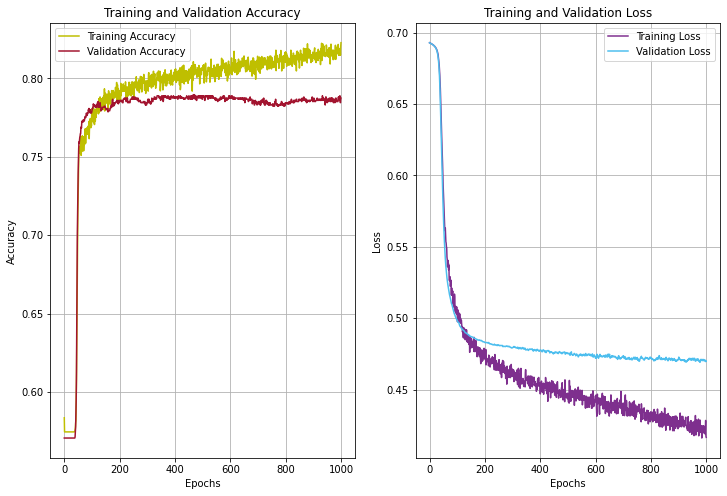

In [ ]:
epochs_range = range(EPOCHS)

fig=plt.figure(figsize=(12, 8))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, history.history['accuracy'], label='Training Accuracy', color=[0.75, 0.75, 0])
plt.plot(epochs_range, history.history['val_accuracy'], label='Validation Accuracy', color= 	[0.6350, 0.0780, 0.1840])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(epochs_range, history.history['loss'], label='Training Loss', color=	[0.4940, 0.1840, 0.5560])
plt.plot(epochs_range, history.history['val_loss'], label='Validation Loss', color= [0.3010, 0.7450, 0.9330])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.title('Training and Validation Loss')
plt.show()
#fig.savefig('TrainHistory_LSTM_1.pdf')

In [ ]:
# test data for test_accuracy
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy*100))

test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(test_accuracy*100))

Training Accuracy: 82.8870
Testing Accuracy:  82.0106


In [ ]:
y_pred_lstm = model.predict(X_test)
y_pred_lstm_round = y_pred_lstm.round().astype('int')
# Classification Reports
report_rfc = classification_report(y_test, y_pred_lstm_round)
print(report_rfc)
y_auc = roc_auc_score(y_test, y_pred_lstm_round)
print('LSTM: ROC AUC=%.3f' % (y_auc))


              precision    recall  f1-score   support

           0       0.81      0.89      0.85       424
           1       0.84      0.73      0.78       332

    accuracy                           0.82       756
   macro avg       0.82      0.81      0.81       756
weighted avg       0.82      0.82      0.82       756

LSTM: ROC AUC=0.810


##Model 2 - Bidirectional LSTM 


In [ ]:
model_BiLSTM_5 = tf.keras.Sequential([
    tf.keras.layers.Embedding(num_words, embedding_matrix.shape[1], input_length = MAX_LEN, weights = [embedding_matrix],
                             trainable = False),                   
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences = True, dropout = 0.6, recurrent_dropout = 0.6)),
    tf.keras.layers.GlobalMaxPool1D(),
    tf.keras.layers.Dropout(0.6),
    tf.keras.layers.Dense(units=8, activation="relu"),
    tf.keras.layers.Dense(units=1, activation="sigmoid")    
])
model_BiLSTM_5.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 50, 100)           1663300   
_________________________________________________________________
bidirectional (Bidirectional (None, 50, 128)           84480     
_________________________________________________________________
global_max_pooling1d (Global (None, 128)               0         
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 1032      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 1,748,821
Trainable params: 85,521
Non-trainable params: 1,663,300
_______________________________________

In [ ]:
model_BiLSTM_5.compile(loss = 'binary_crossentropy', optimizer = tf.keras.optimizers.RMSprop(lr=4*0.0001), metrics = ['acc'])

In [ ]:
#define early stopping callback
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=16)

In [ ]:
history=model_BiLSTM_5.fit(X_train,y_train,batch_size=BATCH_SIZE,epochs=EPOCHS,validation_split=0.15,verbose=1,callbacks = [callback])

Epoch 1/1000
 2/12 [====>.........................] - ETA: 0s - loss: 0.7383 - acc: 0.4434WARNING:tensorflow:Callbacks method `on_train_batch_end` is slow compared to the batch time (batch time: 0.0016s vs `on_train_batch_end` time: 0.1159s). Check your callbacks.


12/12 [==============================] - ETA: 0s - loss: 0.7097 - acc: 0.5026WARNING:tensorflow:Callbacks method `on_test_batch_end` is slow compared to the batch time (batch time: 0.0009s vs `on_test_batch_end` time: 0.0300s). Check your callbacks.


12/12 [==============================] - 2s 145ms/step - loss: 0.7097 - acc: 0.5026 - val_loss: 0.6700 - val_acc: 0.5892
Epoch 2/1000
12/12 [==============================] - 1s 106ms/step - loss: 0.6738 - acc: 0.5885 - val_loss: 0.6522 - val_acc: 0.6186
Epoch 3/1000
12/12 [==============================] - 1s 104ms/step - loss: 0.6590 - acc: 0.6205 - val_loss: 0.6312 - val_acc: 0.6696
Epoch 4/1000
12/12 [==============================] - 1s 106ms/step - loss: 0.6380 - acc: 0.6527 - val_loss: 0.6022 - val_acc: 0.7225
Epoch 5/1000
12/12 [==============================] - 1s 104ms/step - loss: 0.6153 - acc: 0.6868 - val_loss: 0.5684 - val_acc: 0.7657
Epoch 6/1000
12/12 [==============================] - 1s 105ms/step - loss: 0.5876 - acc: 0.7143 - val_loss: 0.5409 - val_acc: 0.7618
Epoch 7/1000
12/12 [==============================] - 1s 106ms/step - loss: 0.5653 - acc: 0.7320 - val_loss: 0.5092 - val_acc: 0.7686
Epoch 8/1000
12/12 [==============================] - 1s 107ms/step - loss:

In [ ]:
# Ref : https://stackoverflow.com/questions/51463383/buffered-data-was-truncated-after-reaching-the-output-size-limit
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail(15)

,loss,acc,val_loss,val_acc,epoch
80,0.435506,0.809037,0.467300,0.797059,80
81,0.440628,0.808172,0.452543,0.797059,81
82,0.439451,0.809211,0.456029,0.799020,82
83,0.436809,0.805402,0.453486,0.800980,83
84,0.440429,0.809730,0.462080,0.786274,84
85,0.436527,0.810422,0.463066,0.791176,85
86,0.429027,0.813366,0.469546,0.787255,86
87,0.436723,0.810076,0.451525,0.794118,87
88,0.437847,0.805229,0.447280,0.794118,88
89,0.440798,0.807133,0.447305,0.796078,89


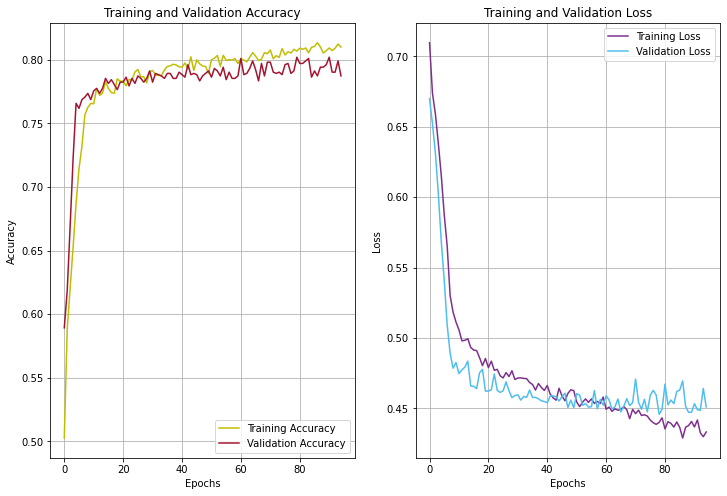

In [ ]:
epochs_range = range(95)# Where 95 is Total Number of Epochs during the training

fig=plt.figure(figsize=(12, 8))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, hist['acc'], label='Training Accuracy', color=[0.75, 0.75, 0])
plt.plot(epochs_range, hist['val_acc'], label='Validation Accuracy', color= 	[0.6350, 0.0780, 0.1840])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(epochs_range, hist['loss'], label='Training Loss', color=	[0.4940, 0.1840, 0.5560])
plt.plot(epochs_range, hist['val_loss'], label='Validation Loss', color= [0.3010, 0.7450, 0.9330])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.title('Training and Validation Loss')
plt.show()
#fig.savefig('TrainingHistory_BiLSTM_83.pdf')

In [ ]:
# test data for test_accuracy
loss, accuracy = model_BiLSTM_5.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy*100))

val_loss, val_accuracy = model_BiLSTM_5.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(val_accuracy*100))

Training Accuracy: 82.7987
Testing Accuracy:  81.7460


In [ ]:
y_pred_blstm = model_BiLSTM_5.predict(X_test)
y_pred_blstm_round = y_pred_blstm.round().astype('int')
# Classification Reports
report_rfc = classification_report(y_test, y_pred_blstm_round)
print(report_rfc)
y_auc = roc_auc_score(y_test, y_pred_blstm_round)
print('BiLSTM: ROC AUC=%.3f' % (y_auc))


              precision    recall  f1-score   support

           0       0.80      0.90      0.85       424
           1       0.85      0.71      0.77       332

    accuracy                           0.82       756
   macro avg       0.82      0.81      0.81       756
weighted avg       0.82      0.82      0.81       756

BiLSTM: ROC AUC=0.806


In [ ]:
X_test.shape

(756, 50)

In [ ]:
y_score = model_BiLSTM_5.predict(X_test)

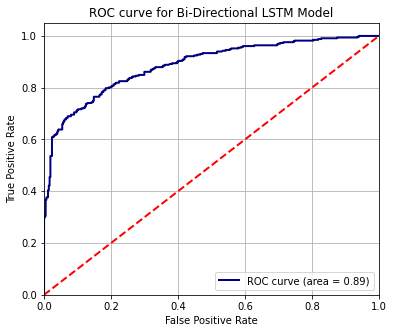

In [ ]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test,y_score)
roc_auc = auc(fpr, tpr)
fig=plt.figure(figsize=(6, 5))
#plt.figure()
plt.plot(fpr, tpr, color= 'navy', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color= 'red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
plt.title('ROC curve for Bi-Directional LSTM Model')
plt.legend(loc="lower right")
plt.show()
#fig.savefig('ROC_BiLSTM_83_1.pdf')

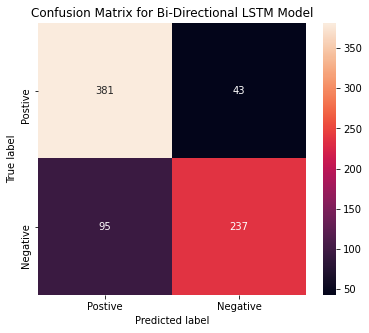

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support
y_score_round = y_score.round().astype('int')
# Creates a confusion matrix
cm = confusion_matrix(y_test,y_score_round) 

# Transform to df for easier plotting
cm_df = pd.DataFrame(cm,
                     index = ['Postive','Negative'], 
                     columns = ['Postive','Negative'])

fig = plt.figure(figsize=(6,5))
sns.heatmap(cm_df, annot=True,fmt='g')
plt.title('Confusion Matrix for Bi-Directional LSTM Model')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()
#fig.savefig('ConfusionMatrix_BiLSTM_final.pdf')

##Model 3 - Gated Recurrent Unit

In [ ]:
model_GRU_3 = tf.keras.Sequential([
    tf.keras.layers.Embedding(num_words, embedding_matrix.shape[1], input_length = MAX_LEN, weights = [embedding_matrix],
                             trainable = False),   
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(64 ,return_sequences=True,dropout = 0.4, recurrent_dropout = 0.4)),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(64 ,return_sequences=True,dropout = 0.6, recurrent_dropout = 0.6)),   
    tf.keras.layers.Dropout(0.6),
    tf.keras.layers.Dense(units=16, activation="elu"),
    tf.keras.layers.GlobalMaxPool1D(),
    tf.keras.layers.Dense(units=1, activation="sigmoid")   
])
model_GRU_3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 50, 100)           1663300   
_________________________________________________________________
bidirectional_1 (Bidirection (None, 50, 128)           63744     
_________________________________________________________________
bidirectional_2 (Bidirection (None, 50, 128)           74496     
_________________________________________________________________
dropout_1 (Dropout)          (None, 50, 128)           0         
_________________________________________________________________
dense_3 (Dense)              (None, 50, 16)            2064      
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 16)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                

In [ ]:
model_GRU_3.compile(loss = 'binary_crossentropy',  optimizer = tf.keras.optimizers.RMSprop(lr=4*0.0001), metrics = ['acc'])

In [ ]:
# early stopping the training if the loss is not decreasing with patience value as 20.
callback_early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=20)
#lr=4*0.0001
# scheduling the learning rate.
def scheduler(epoch):
  if epoch < 100:
    return 4*0.0001
  else:
    return epoch*0.000001

learning_callback = tf.keras.callbacks.LearningRateScheduler(scheduler)

In [ ]:
#define early stopping callback
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=20)

In [ ]:
history=model_GRU_3.fit(X_train,y_train,batch_size=BATCH_SIZE,epochs=100,validation_split = .2,verbose=2)

Epoch 1/100


11/11 - 5s - loss: 0.7016 - acc: 0.5728 - val_loss: 0.6581 - val_acc: 0.5985
Epoch 2/100
11/11 - 2s - loss: 0.5976 - acc: 0.6854 - val_loss: 0.6286 - val_acc: 0.6566
Epoch 3/100
11/11 - 2s - loss: 0.5480 - acc: 0.7299 - val_loss: 0.5663 - val_acc: 0.7250
Epoch 4/100
11/11 - 2s - loss: 0.5118 - acc: 0.7579 - val_loss: 0.5572 - val_acc: 0.7397
Epoch 5/100
11/11 - 2s - loss: 0.4987 - acc: 0.7660 - val_loss: 0.5311 - val_acc: 0.7581
Epoch 6/100
11/11 - 2s - loss: 0.4954 - acc: 0.7717 - val_loss: 0.5449 - val_acc: 0.7500
Epoch 7/100
11/11 - 2s - loss: 0.4838 - acc: 0.7802 - val_loss: 0.4883 - val_acc: 0.7765
Epoch 8/100
11/11 - 2s - loss: 0.4781 - acc: 0.7796 - val_loss: 0.4819 - val_acc: 0.7750
Epoch 9/100
11/11 - 2s - loss: 0.4745 - acc: 0.7908 - val_loss: 0.4865 - val_acc: 0.7750
Epoch 10/100
11/11 - 2s - loss: 0.4717 - acc: 0.7908 - val_loss: 0.4814 - val_acc: 0.7765
Epoch 11/100
11/11 - 2s - loss: 0.4695 - acc: 0.7890 - val_loss: 0.4784 - val_acc: 0.7765
Epoch 12/100
11/11 - 2s - loss:

In [ ]:
# Ref : https://stackoverflow.com/questions/51463383/buffered-data-was-truncated-after-reaching-the-output-size-limit
#model_GRU_7.save('model_GRU_7.h5')
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail(15)

,loss,acc,val_loss,val_acc,epoch
85,0.409173,0.821744,0.469732,0.787500,85
86,0.401859,0.829286,0.479640,0.785294,86
87,0.406900,0.823584,0.481824,0.783824,87
88,0.409169,0.825239,0.468823,0.791176,88
89,0.402382,0.830574,0.469433,0.791176,89
90,0.401383,0.821192,0.468708,0.787500,90
91,0.398344,0.827447,0.469054,0.790441,91
92,0.400814,0.825975,0.471541,0.791176,92
93,0.399416,0.829286,0.470213,0.791176,93
94,0.394773,0.824503,0.479318,0.786029,94


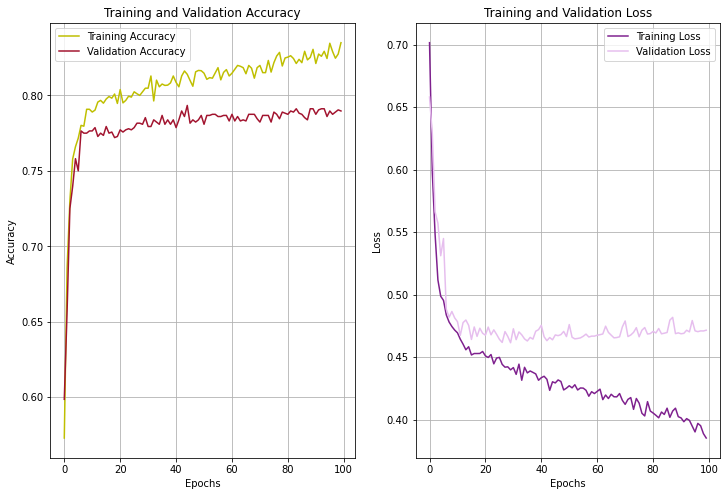

In [ ]:
epochs_range = range(100)

fig=plt.figure(figsize=(12, 8))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, history.history['acc'], label='Training Accuracy', color=[0.75, 0.75, 0])
plt.plot(epochs_range, history.history['val_acc'], label='Validation Accuracy', color= 	[0.6350, 0.0780, 0.1840])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(epochs_range, history.history['loss'], label='Training Loss', color=	[0.4940, 0.1240, 0.5560])
plt.plot(epochs_range, history.history['val_loss'], label='Validation Loss', color= [0.9010, 0.7450, 0.9330])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.title('Training and Validation Loss')
plt.show()
#fig.savefig('TrainingHistory_GRU_3.pdf')

In [ ]:
# test data for test_accuracy
loss, accuracy = model_GRU_3.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy*100))

val_loss, val_accuracy = model_GRU_3.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(val_accuracy*100))

Training Accuracy: 83.9759
Testing Accuracy:  81.8783


In [ ]:
y_pred_gru = model_GRU_3.predict(X_test)
y_pred_gru_round = y_pred_gru.round().astype('int')
# Classification Reports
report_rfc = classification_report(y_test, y_pred_gru_round)
print(report_rfc)
y_auc = roc_auc_score(y_test, y_pred_gru_round)
print('GRU: ROC AUC=%.3f' % (y_auc))


              precision    recall  f1-score   support

           0       0.80      0.90      0.85       424
           1       0.85      0.71      0.78       332

    accuracy                           0.82       756
   macro avg       0.83      0.81      0.81       756
weighted avg       0.82      0.82      0.82       756

GRU: ROC AUC=0.807


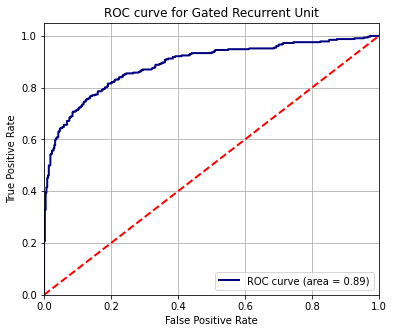

In [ ]:
from sklearn.metrics import roc_curve, auc
y_score = model_GRU_3.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test,y_score)
roc_auc = auc(fpr, tpr)
fig=plt.figure(figsize=(6, 5))
#plt.figure()
plt.plot(fpr, tpr, color= 'navy', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color= 'red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
plt.title('ROC curve for Gated Recurrent Unit')
plt.legend(loc="lower right")
plt.show()
fig.savefig('ROC_GRU.pdf')

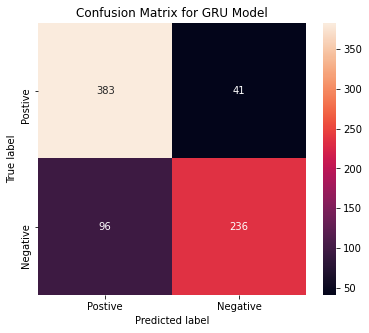

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support
y_score_round = y_score.round().astype('int')
# Creates a confusion matrix
cm = confusion_matrix(y_test,y_score_round) 

# Transform to df for easier plotting
cm_df = pd.DataFrame(cm,
                     index = ['Postive','Negative'], 
                     columns = ['Postive','Negative'])

fig = plt.figure(figsize=(6,5))
sns.heatmap(cm_df, annot=True,fmt='g')
plt.title('Confusion Matrix for GRU Model')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()
#fig.savefig('ConfusionMatrix_GRU.pdf')

In [ ]:
print(confusion_matrix(y_test,y_score_round) )

[[383  41]
 [ 96 236]]


#Transfer Learning for NLP


Ref: https://towardsdatascience.com/bert-explained-state-of-the-art-language-model-for-nlp-f8b21a9b6270

Ref : https://www.kaggle.com/xhlulu/disaster-nlp-keras-bert-using-tfhub

Ref : http://jalammar.github.io/a-visual-guide-to-using-bert-for-the-first-time/

Ref : https://tfhub.dev/tensorflow/bert_en_uncased_L-24_H-1024_A-16/2

##Setting up BERT


Bidirectional Encoder Representations from Transformers (BERT) is a technique for NLP (Natural Language Processing) pre-training developed by Google. 
A pre-trained BERT model can be fine-tuned with just one additional output layer to create good models.

In [ ]:
# The official tokenization script created by the Google team
!wget --quiet https://raw.githubusercontent.com/tensorflow/models/master/official/nlp/bert/tokenization.py

In [ ]:
!pip install transformers

     |████████████████████████████████| 1.3MB 7.2MB/s 
     |████████████████████████████████| 890kB 31.1MB/s 
     |████████████████████████████████| 1.1MB 44.6MB/s 
     |████████████████████████████████| 2.9MB 49.2MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.43-cp36-none-any.whl size=893257 sha256=b64a4be71f6c9bc10e11a8cc702013cf2c73e71f0e2848434505790b65678036
  Stored in directory: /root/.cache/pip/wheels/29/3c/fd/7ce5c3f0666dab31a50123635e6fb5e19ceb42ce38d4e58f45
Successfully built sacremoses


In [ ]:
!pip install -q -U tf-hub-nightly
!pip install -q tfds-nightly

     |████████████████████████████████| 112kB 9.0MB/s 
     |████████████████████████████████| 3.6MB 7.1MB/s 


In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import ModelCheckpoint
import tensorflow_hub as hub
import tokenization
from tensorflow import keras


##Using BERT
Bidirectional Encoder Representations from Transformers

In [ ]:
#Ref Source for bert_encode function: https://www.kaggle.com/user123454321/bert-starter-inference
def bert_encode(texts, tokenizer, max_len=512):
    all_tokens = []
    all_masks = []
    all_segments = []
    
    for text in texts:
        text = tokenizer.tokenize(text)
            
        text = text[:max_len-2]
        input_sequence = ["[CLS]"] + text + ["[SEP]"]
        pad_len = max_len - len(input_sequence)
        
        tokens = tokenizer.convert_tokens_to_ids(input_sequence)
        tokens += [0] * pad_len
        pad_masks = [1] * len(input_sequence) + [0] * pad_len
        segment_ids = [0] * max_len
        
        all_tokens.append(tokens)
        all_masks.append(pad_masks)
        all_segments.append(segment_ids)
    
    return np.array(all_tokens), np.array(all_masks), np.array(all_segments)

The BERT tokenizer does a pretty good preprocessing job by itself, 
therefore the input text is tokenized directly without any previous cleaning/preprocessing.

In [ ]:
train_df_master = pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/Kaggle/train.csv")
test_df_master = pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/Kaggle/test.csv")

In [ ]:
train_df_master[5000:]

,id,keyword,location,text,target
5000,7132,military,NY,13 reasons why we love women in the military ...,0
5001,7134,military,302,13 reasons why we love women in the military ...,0
5002,7135,military,NaN,@UniversityofLaw For the people who died in Hu...,1
5003,7136,military,NaN,Lot of 20 Tom Clancy Military Mystery Novels -...,0
5004,7137,military,NaN,@CochiseCollege For the people who died in Hum...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


In [ ]:
#Dropping the location Column
train_df = train_df_master.drop('location', axis=1)

In [ ]:
train= train_df[:6500]
test=train_df[6500:]

In [ ]:
print(train.shape)
print(test.shape)

(6500, 4)
(1113, 4)


In [ ]:
module_url = "https://tfhub.dev/tensorflow/bert_en_uncased_L-24_H-1024_A-16/2"
#module_url ="https://tfhub.dev/tensorflow/bert_en_uncased_L-24_H-1024_A-16/1"
bert_layer = hub.KerasLayer(module_url, trainable=True)

In [ ]:
#Load tokenizer from the bert layer
vocab_file = bert_layer.resolved_object.vocab_file.asset_path.numpy()
do_lower_case = bert_layer.resolved_object.do_lower_case.numpy()
tokenizer = tokenization.FullTokenizer(vocab_file, do_lower_case)

In [ ]:
train_input = bert_encode(train.text.values, tokenizer, max_len=160)
test_input = bert_encode(test.text.values, tokenizer, max_len=160)
train_labels = train.target.values
test_labels = test.target.values

In [ ]:
#Ref : https://www.kaggle.com/xhlulu/disaster-nlp-keras-bert-using-tfhub
#Ref : https://tfhub.dev/tensorflow/bert_en_uncased_L-24_H-1024_A-16/2

max_len=160
input_word_ids = Input(shape=(max_len,), dtype=tf.int32, name="input_word_ids")
input_mask = Input(shape=(max_len,), dtype=tf.int32, name="input_mask")
segment_ids = Input(shape=(max_len,), dtype=tf.int32, name="segment_ids")

_, sequence_output = bert_layer([input_word_ids, input_mask, segment_ids])
clf_output = sequence_output[:, 0, :]
out = Dense(1, activation='sigmoid')(clf_output)
    
model = Model([input_word_ids, input_mask, segment_ids], out)
model.compile(Adam(lr=1e-5), loss='binary_crossentropy', metrics=['accuracy'])

The model configuration did not use any Dense layer. Simply added a sigmoid output directly to the last layer of BERT.

In [ ]:
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_word_ids (InputLayer)     [(None, 160)]        0                                            
__________________________________________________________________________________________________
input_mask (InputLayer)         [(None, 160)]        0                                            
__________________________________________________________________________________________________
segment_ids (InputLayer)        [(None, 160)]        0                                            
__________________________________________________________________________________________________
keras_layer (KerasLayer)        [(None, 1024), (None 335141889   input_word_ids[0][0]             
                                                                 input_mask[0][0]      

In [ ]:
checkpoint = ModelCheckpoint('bert_model5.h5', monitor='val_loss', save_best_only=True)

train_history = model.fit(
    train_input, train_labels,
    validation_split=0.2,
    epochs=2,
    callbacks=[checkpoint],
    batch_size=2
)

Epoch 1/2
2600/2600 [==============================] - 314s 121ms/step - loss: 0.4637 - accuracy: 0.7946 - val_loss: 0.3489 - val_accuracy: 0.8715
Epoch 2/2
2600/2600 [==============================] - 277s 107ms/step - loss: 0.3613 - accuracy: 0.8571 - val_loss: 0.3505 - val_accuracy: 0.8715


In [ ]:
import pandas as pd

hist = pd.DataFrame(train_history.history)
hist['epoch'] = train_history.epoch
hist.tail(15)

,loss,accuracy,val_loss,val_accuracy,epoch
0,0.463699,0.794615,0.348930,0.871538,0
1,0.361350,0.857115,0.350492,0.871538,1


In [ ]:
# test data for test_accuracy
loss, accuracy = model.evaluate(train_input, train_labels, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy*100))

val_loss, val_accuracy = model.evaluate(test_input, test_labels, verbose=False)
print("Testing Accuracy:  {:.4f}".format(val_accuracy*100))

Training Accuracy: 90.0000
Testing Accuracy:  82.7493


In [ ]:
test_pred = model.predict(test_input)
test_pred_BERT_int= test_pred.round().astype('int')

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(test_labels, test_pred_BERT_int))

              precision    recall  f1-score   support

           0       0.79      0.91      0.85       586
           1       0.88      0.74      0.80       527

    accuracy                           0.83      1113
   macro avg       0.84      0.82      0.82      1113
weighted avg       0.83      0.83      0.83      1113



In [ ]:
y_test = test_labels
y_score = test_pred

<Figure size 864x576 with 0 Axes>

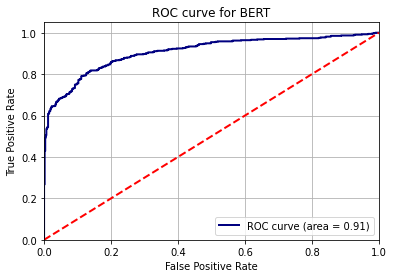

In [ ]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test,y_score)
roc_auc = auc(fpr, tpr)
fig=plt.figure(figsize=(12, 8))
plt.figure()
plt.plot(fpr, tpr, color= 'navy', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color= 'red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
plt.title('ROC curve for BERT')
plt.legend(loc="lower right")
plt.show()
#fig.savefig('ROC_BERT.pdf')

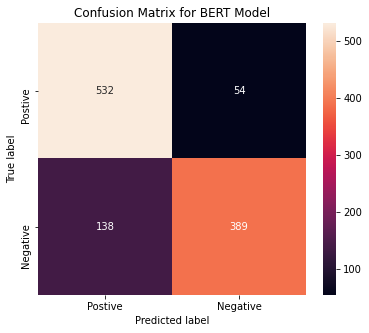

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support
y_score_round = y_score.round().astype('int')
# Creates a confusion matrix
cm = confusion_matrix(y_test,y_score_round) 

# Transform to df for easier plotting
cm_df = pd.DataFrame(cm,
                     index = ['Postive','Negative'], 
                     columns = ['Postive','Negative'])

fig = plt.figure(figsize=(6,5))
sns.heatmap(cm_df, annot=True,fmt='g')
plt.title('Confusion Matrix for BERT Model')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()
#fig.savefig('ConfusionMatrix_BERT.pdf')

##Inference on the BERT Model using 20 test samples 

In [ ]:
#fetching previously saved model and testing it with 20 test samples from the test data.

my_reloaded_model = tf.keras.models.load_model(('/content/gdrive/My Drive/Colab Notebooks/Kaggle/bert_model5_1.h5'),custom_objects={'KerasLayer':hub.KerasLayer})

In [ ]:
my_reloaded_model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_word_ids (InputLayer)     [(None, 160)]        0                                            
__________________________________________________________________________________________________
input_mask (InputLayer)         [(None, 160)]        0                                            
__________________________________________________________________________________________________
segment_ids (InputLayer)        [(None, 160)]        0                                            
__________________________________________________________________________________________________
keras_layer_3 (KerasLayer)      [(None, 1024), (None 335141889   input_word_ids[0][0]             
                                                                 input_mask[0][0]           

In [ ]:
samples = test_df_master['text'][3240:].values
samples_encoded = bert_encode(samples, tokenizer, max_len=160)
predict_saamples = my_reloaded_model.predict(samples_encoded)

In [ ]:
## 1 stands for disastrous relevant tweet and 0 stands for disastrous irrelevant tweet 
for i in range(len(samples)):
  #test_predict = my_reloaded_model.predict(test_input)
  print(samples[i], ":", predict_saamples[i].round().astype('int'))
  print("\n")

RT @australian Debris found on an Indian Ocean island confirmed to be from flight #MH370. http://t.co/gY9MrSl6x2 : [1]


Cramer: Iger's 3 words that wrecked Disney's stock http://t.co/4dGpBAiVL7 : [0]


Almost *wrecked* my van the other day because of this guy (yeah I brake &amp; also care for animals ~ get used to it)!  https://t.co/8ZaHavmtT6 : [0]


'What manner of human being would parcel out a baby as though it were a wrecked car in a junk yard? TheÛ_' ÛÓ dtom2 http://t.co/lj6lzo4isX : [0]


@Nathan26_RFC thought you said Saturday night there and near died lolol you'll be wrecked!! : [0]


I just wanna ease your mind and make you feel alright.???? : [0]


@yakubOObs think he deactivated because his notifications are aids after tesco wrecked him lol : [0]


RT CNBC '3 words from Disney CEO Bob Iger wrecked Disney's stock says Jim Cramer: http://t.co/f0texKsqhL http://t.co/ilySLaTMgI' : [0]


Smackdown tyme this should put me in a good mood again since it got wrecked smh : [0]


@

#Key References



Ref : https://machinelearningmastery.com/gentle-introduction-bag-words-model/

Ref : https://towardsdatascience.com/stemming-vs-lemmatization-2daddabcb221

Ref : https://towardsdatascience.com/a-simple-explanation-of-the-bag-of-words-model-b88fc4f4971

Ref : https://nlp.stanford.edu/projects/glove/

Ref: https://medium.com/analytics-vidhyaword-vectorization-using-glove-76919685ee0b

Ref : https://www.kaggle.com/shahules/basic-eda-cleaning-and-glove

Ref : https://stackoverflow.com/questions/43035827/whats-the-difference-between-a-bidirectional-lstm-and-an-lstm

Ref: https://towardsdatascience.com/bert-explained-state-of-the-art-language-model-for-nlp-f8b21a9b6270

Ref : https://www.kaggle.com/xhlulu/disaster-nlp-keras-bert-using-tfhub

Ref : http://jalammar.github.io/a-visual-guide-to-using-bert-for-the-first-time/

Ref : https://tfhub.dev/tensorflow/bert_en_uncased_L-24_H-1024_A-16/2

Ref:https://www.kaggle.com/user123454321/bert-starter-inference